## Problem Description: Titanic Case Study

Titanic was one of the worst shipwrecks in history, and is certainly the most well-known. One of the reasons that the shipwreck lead to such loss of life is that were not enough lifeboats for the passengers and crew.  Although in case of surviving the sinking, some groups of people were more likely to survive than others, like women, children, and the upper-class. Machine learning models are applied on the dataset to analyze what sorts of people were likely to survive.         

### FEATURES:

 PassengerId : The id given to each traveller on the boat.
 
 Pclass : The Passenger class. It has three possible values: 1,2,3 (first, second and third class).
 
 Name : The Name of the passeger.
 
 Sex : The Gender of the Passenger.
 
 Age : The Age of the Passenger.
 
 SibSp : The number of siblings and spouses traveling with the passenger.
 
 Parch : number of parents and children traveling with the passenger.
 
 Ticket : The ticket number of the Passenger.
 
 Fare : The ticket Fare of the passenger.
 
 Cabin : The cabin number.
 
 Embarked : This describe three areas of the Titanic from which the people embark. 

Qualitative Features (Categorical) : PassengerId , Pclass , Survived , Sex , Ticket , Cabin , Embarked.

Quantitative Features (Numerical) : SibSp , Parch , Age , Fare.

In [1]:
## import all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Sklearn
from sklearn.preprocessing import normalize ## Scale input vectors to unit norm (vector length)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis

# Evaluation Metrics
from sklearn.metrics.classification import accuracy_score, confusion_matrix, log_loss



### Survival is the Target Variable.

In [2]:
train = pd.read_csv('train.csv' ) # Train
test = pd.read_csv('test.csv' ) # Test
test_df = test.copy()

In [3]:
train.shape

(891, 12)

In [4]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [5]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Let's look at all the columns and examine Null Values

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### We see that Age, Cabin and Embarked have Null values.

In [8]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Test data

In [9]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


### As we can see, Test data doesn't have 'Survived' column and that's what we have to predict.!

### Understanding the Survival Ratio in Train set :-


In [10]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

### percentage of survival:-

In [11]:
train.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

## So, out of 891 passengers, only 342 (38%) survived.

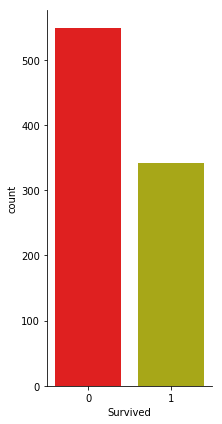

In [12]:
sns.factorplot(x='Survived' , kind='count' , data=train , palette=['r','y'] , size=6 , aspect=.5)


## Survival based on "Pclass" :

In [13]:
pd.crosstab(train.Pclass , train.Survived , margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [14]:
train[['Pclass' , 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


### So, there is 62.96% Survival chance for 1st Class. 

#### This clearly shows that First Class People were given priority first.

###  Plot for better understanding:


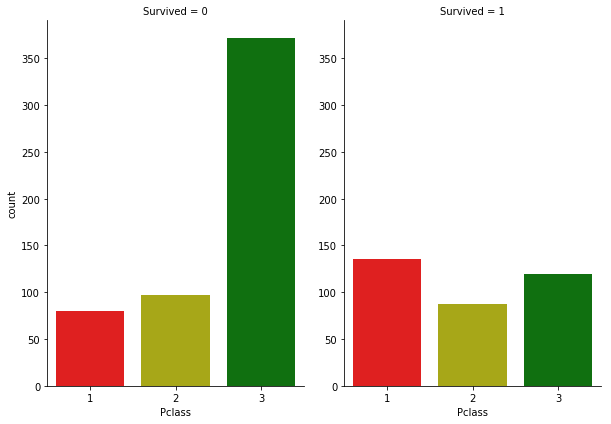

In [15]:
sns.factorplot(x='Pclass' , data=train , col='Survived' , kind='count' , size=6 , aspect=.7,  palette=['r','y','g'])

### We can clearly see that Class-3 people died in large numbers (least priority)

## Survival based on "Gender" :

In [16]:
pd.crosstab(train.Sex , train.Survived , margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [17]:
pd.crosstab(train.Sex , train.Survived , normalize='index')

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


## This shows that Females were more likely to Survive with Survival Probability (74%) is almost thrice that of Men (18%) . 

### Plot for better understanding:

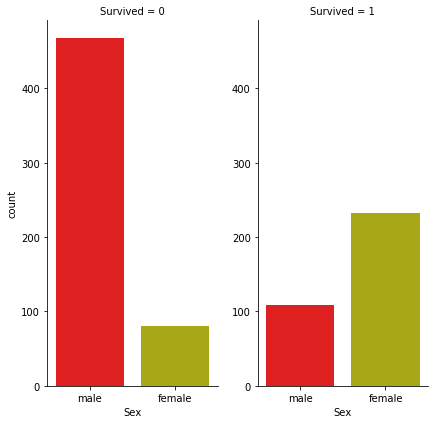

In [18]:
sns.factorplot(x='Sex' , data=train , col='Survived' , kind='count' , size=6 , aspect=.5, palette=['r','y'])

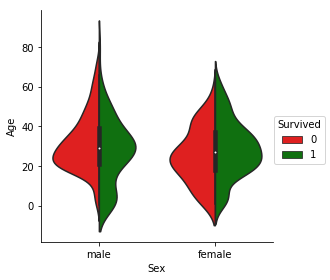

In [19]:
sns.factorplot(x='Sex' , y='Age' , data=train , hue='Survived' , kind='violin' , palette=['r','g'] , split=True)

### We can see that Males have Surviving Density less than Females (Bulged) . And majority of those who survived belonged to the category of Age limit 20-30 . 

## Survival bassed on Age:


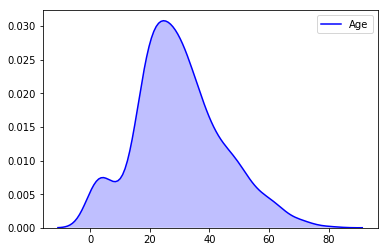

In [20]:
sns.kdeplot(train.Age , shade=True , color='b')

### Age has Null values.


In [21]:
print('Median : ' + str(train.Age.median()) + '  Mean : ' + str(train.Age.mean()))

Median : 28.0  Mean : 29.69911764705882


### Here, mean and median are both close, so we can fill with any of these.



In [22]:
print(train.Age.count())

714


### Filling the missing values using median.

In [23]:
#  Fill NaN values in train data
train['Age'].fillna(train.Age.median() , inplace=True)

In [24]:
print(train.Age.count())  # Null values filled

891


### Filling Null values in Test set:

In [25]:
# Fill NaN values in test
test['Age'].fillna(test['Age'].median() , inplace=True)

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


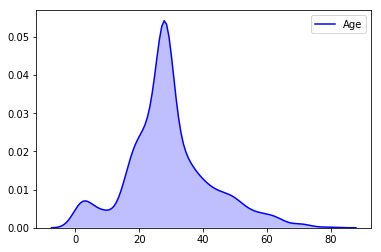

In [27]:
# kde plot.
sns.kdeplot(train['Age'] , shade=True , color='b')

### We can see that the plot has peak close to 30. So, we can infer that majority of people on Titanic had Age close to 30.

### Survival bassed on Fare:

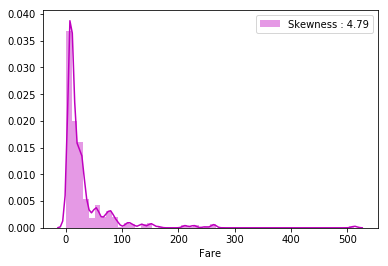

In [28]:
train['Fare'] = train['Fare'].fillna(train['Fare'].median())

# Explore Fare distribution 
g = sns.distplot(train["Fare"], color="m", label="Skewness : %.2f"%(train["Fare"].skew()))
g = g.legend(loc="best")

### Observations

* The Fare distribution is very skewed to the left. This can lead to overweigthing the model with very high values.

* In this case, it is better to transform it with the log function to reduce the skewness and redistribute the data.

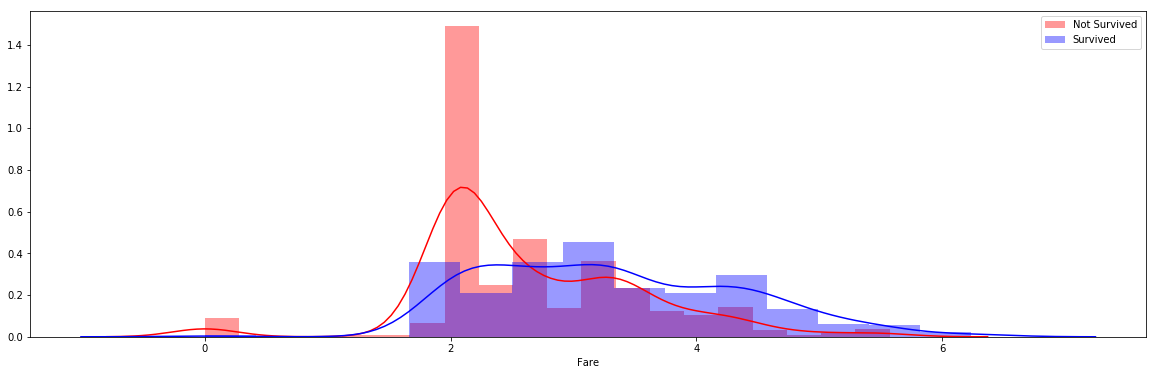

In [29]:
# Apply log to Fare to reduce skewness distribution

train["Fare"] = train["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
a4_dims = (20, 6)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.distplot(train["Fare"][train["Survived"] == 0], color="r", label="Skewness : %.2f"%(train["Fare"].skew()), ax=ax)
g = sns.distplot(train["Fare"][train["Survived"] == 1], color="b", label="Skewness : %.2f"%(train["Fare"].skew()))
#g = g.legend(loc="best")
g = g.legend(["Not Survived","Survived"])

### Observations:
0 to 2.7: less survivors.

greater than 2.7: more survivors

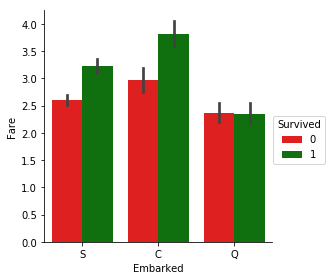

In [30]:
sns.factorplot(x='Embarked' , y ='Fare' , kind='bar', data=train , hue='Survived' , palette=['r','g'])

### We can see that those who paid high,mostly survived.

## Survival based on point of embarkation.

In [31]:
print(train.Embarked.count())

889


### Embarked has Null values

In [32]:
# Fill missing values in train data
train['Embarked'].fillna(train['Embarked'].mode()[0] ,inplace=True)

In [33]:
train.Embarked.count() # filled the values with Mode.

891

In [34]:
pd.crosstab([train.Sex,train.Survived] , [train.Pclass,train.Embarked] , margins=True)

Pclass            1           2           3           All
Embarked          C  Q    S   C  Q    S   C   Q    S     
Sex    Survived                                          
female 0          1  0    2   0  0    6   8   9   55   81
       1         42  1   48   7  2   61  15  24   33  233
male   0         25  1   51   8  1   82  33  36  231  468
       1         17  0   28   2  0   15  10   3   34  109
All              85  2  129  17  3  164  66  72  353  891

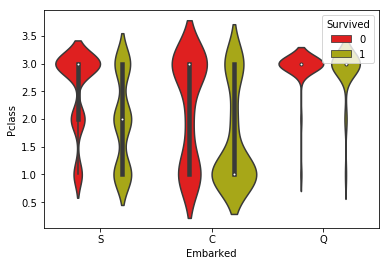

In [35]:
sns.violinplot(x='Embarked' , y='Pclass' , data=train , hue='Survived' , palette=['r','y'])

### We can see that those who embarked at C with First Class ticket had a good chance of Survival. 

## Survival on the basis of number of Siblings:-

In [36]:
train[['SibSp' , 'Survived']].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


### This shows that  individuals having 1 or 2 siblings or having spouse had the highest Probability of Survival.

## Survival on basis of number of Parents/Children.

In [37]:
train[['Parch','Survived']].groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


### This shows that individuals with 1,2 or 3 family members had a greater Probability of Survival

# Feature Engineering:-

### *Creating a New Attribute 'Alone' , which would be True, if the person is travelling Alone.

In [38]:
# Train
train['Alone']=0
train.loc[(train['SibSp']==0) & (train['Parch']==0) , 'Alone'] = 1

# Similarly for test
test['Alone']=0
test.loc[(test['SibSp']==0) & (test['Parch']==0) , 'Alone'] = 1

In [39]:
# lets verify
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,2.135148,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,3.948596,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,3.048088,NaN,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,2.409941,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,3.403555,NaN,C,0


### As we have created a new feature 'Alone', therefore dropping SibSp and Parch.
### Cabin contains a lot of missing values, therefore dropping it.
### Names, PassengerId and TicketNumber doesn't help in finding Probability of Survival, therefore Dropping them too.


In [40]:
drop_features = ['PassengerId' , 'Name' , 'SibSp' , 'Parch' ,  'Cabin', 'Ticket']
# Train
train.drop(drop_features , axis=1, inplace = True)
# Test
test.drop(drop_features , axis=1 , inplace = True)

In [41]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
0,0,3,male,22.0,1.981001,S,0
1,1,1,female,38.0,4.266662,C,0
2,1,3,female,26.0,2.070022,S,1
3,1,1,female,35.0,3.972177,S,0
4,0,3,male,35.0,2.085672,S,1


In [42]:
# Verifyinf Test set
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null float64
Fare        417 non-null float64
Embarked    418 non-null object
Alone       418 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 19.7+ KB


In [43]:
# Fill missing values in test
test['Fare'].fillna(test['Fare'].median() , inplace=True)

In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null float64
Fare        418 non-null float64
Embarked    418 non-null object
Alone       418 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 19.7+ KB


## Converting Categorical Variables into Numeric:

This is done because Modelling Algos cannot process Categorical String Variables.

* Pclass and Alone Attribute is already mapped.
* Sex Attribute has (Male/Female) , which will be mapped to 0/1.
* Dividing Age into 5 categories and Mapping them with 0/1/2/3/4.
* Dividing Fare into 4 categories and Mapping them to 0/1/2/3.
* Embarked Attribute has (S/C/Q) , which will be mapped to 0/1/2 respectively.

In [45]:
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
0,0,3,male,22.0,1.981001,S,0
1,1,1,female,38.0,4.266662,C,0
2,1,3,female,26.0,2.070022,S,1
3,1,1,female,35.0,3.972177,S,0
4,0,3,male,35.0,2.085672,S,1
5,0,3,male,28.0,2.135148,Q,1
6,0,1,male,54.0,3.948596,S,1
7,0,3,male,2.0,3.048088,S,0
8,1,3,female,27.0,2.409941,S,0
9,1,2,female,14.0,3.403555,C,0


In [46]:
# Create a function to Map all values

def map_all(frame):
    # Map Sex
    frame['Sex'] = frame.Sex.map({'female': 0 ,  'male': 1}).astype(int)
    
    # Map Embarked
    frame['Embarked'] = frame.Embarked.map({'S' : 0 , 'C': 1 , 'Q':2}).astype(int)
    
    # Map Age
    # Age varies from 0.42 to 80, therefore 5 categories map to range of 16.
    frame.loc[frame.Age <= 16 , 'Age'] = 0
    frame.loc[(frame.Age >16) & (frame.Age<=32) , 'Age'] = 1
    frame.loc[(frame.Age >32) & (frame.Age<=48) , 'Age'] = 2
    frame.loc[(frame.Age >48) & (frame.Age<=64) , 'Age'] = 3
    frame.loc[(frame.Age >64) & (frame.Age<=80) , 'Age'] = 4
    
    # Map Fare
    # Fare varies from 0 to 512 with and we will map it depending upon the quartile variation.
    # Look at train.describe() above, you will see 25% -> 7.91 , 50% -> 14.453 , 75% -> 31
    frame.loc[(frame.Fare <= 7.91) , 'Fare'] = 0
    frame.loc[(frame.Fare > 7.91) & (frame.Fare <= 14.454) , 'Fare'] = 1
    frame.loc[(frame.Fare > 14.454) & (frame.Fare <= 31) , 'Fare'] = 2
    frame.loc[(frame.Fare > 31) , 'Fare'] = 3

In [47]:
map_all(train)
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
0,0,3,1,1.0,0.0,0,0
1,1,1,0,2.0,0.0,1,0
2,1,3,0,1.0,0.0,0,1
3,1,1,0,2.0,0.0,0,0
4,0,3,1,2.0,0.0,0,1
5,0,3,1,1.0,0.0,2,1
6,0,1,1,3.0,0.0,0,1
7,0,3,1,0.0,0.0,0,0
8,1,3,0,1.0,0.0,0,0
9,1,2,0,0.0,0.0,1,0


In [48]:
# Similarly for test
map_all(test)
test.head()

,Pclass,Sex,Age,Fare,Embarked,Alone
0,3,1,2.0,0.0,2,1
1,3,0,2.0,0.0,0,0
2,2,1,3.0,1.0,2,1
3,3,1,1.0,1.0,0,1
4,3,0,1.0,1.0,0,0


In [49]:
# X_train (contains all features for training purpose but excluding Survived),
# Y_train (survival result of X-Train) and test are our 3 main datasets for the next sections
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_train.shape, Y_train.shape, test.shape


((891, 6), (891,), (418, 6))

In [50]:
X_test = test.copy()
#std_scaler = StandardScaler()
#X_train = std_scaler.fit_transform(X_train)
#X_test = std_scaler.transform(X_test)

## 4.1. Naive Bayes classifier

This is a family of simple probabilistic classifiers based on applying Bayes' theorem with strong independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of features in a learning problem.

In [51]:
naive = GaussianNB()
naive.fit(X_train, Y_train)

#Y_pred = naive.predict(test)
acc_naive = round(naive.score(X_train, Y_train) * 100, 2)
acc_naive

78.0

## 4.2. Logistic Regression
Logistic regression measures the relationship between the categorical dependent feature (in our case Survived) and the other independent features. It estimates probabilities using a cumulative logistic distribution:

In [52]:
regression = LogisticRegression()
regression.fit(X_train, Y_train)
#Y_pred = regression.predict(X_test)
acc_regression = round(regression.score(X_train, Y_train) * 100, 2)
acc_regression

79.010000000000005

## 4.3. Support Vector Machine 
Given a set of training samples, each sample is marked as belonging to one or the other of two categories.

The SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier.

In [53]:
svc=SVC()
svc.fit(X_train, Y_train)
#Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

81.370000000000005

## 4.4. k-Nearest Neighbors algorithm (k-NN)
This is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

In [54]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski', 
                           metric_params=None, n_jobs=1, n_neighbors=10, p=2, 
                           weights='uniform')
knn.fit(X_train, Y_train)
knn_predictions = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn


82.489999999999995

## 4.5. Decision tree
This predictive model maps features (tree branches) to conclusions about the target value (tree leaves).

The target features take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.

In [55]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
#Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

83.049999999999997

## 4.6. Random Forests
This is one of the most popular classfier. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees

In [56]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
random_forest_predictions = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

83.049999999999997

## MODEL SUMMARY:-

In [57]:
models = [GaussianNB(),LogisticRegression(),SVC(),KNeighborsClassifier(),
        DecisionTreeClassifier(),RandomForestClassifier()]

model_names=['NaiveBayes','LogisticRegression','SVM','KNN','DecisionTree','RandomForest']

accuracy = [acc_naive, acc_regression, acc_svc, acc_knn, acc_decision_tree, acc_random_forest]

for model in range(len(models)):
    clf = models[model]
    clf.fit(X_train,Y_train)
    pred = clf.predict(X_test)
    
compare = pd.DataFrame({'Algorithm' : model_names , 'Accuracy' : accuracy})
compare

,Accuracy,Algorithm
0,78.00,NaiveBayes
1,79.01,LogisticRegression
2,81.37,SVM
3,82.49,KNN
4,83.05,DecisionTree
5,83.05,RandomForest


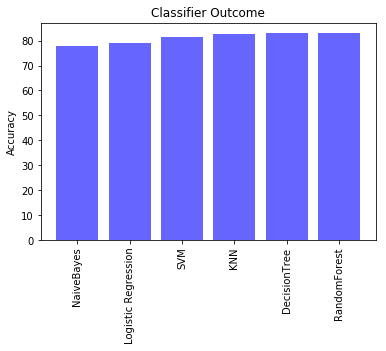

In [58]:
objects = ('NaiveBayes','Logistic Regression', 'SVM', 'KNN', 'DecisionTree', 'RandomForest')
x_pos = np.arange(len(objects))
accuracy = [acc_naive, acc_regression, acc_svc, acc_knn, acc_decision_tree, acc_random_forest]
    
plt.bar(x_pos, accuracy, align='center', alpha=0.6, color='b')
plt.xticks(x_pos, objects, rotation='vertical')
plt.ylabel('Accuracy')
plt.title('Classifier Outcome')
plt.show()

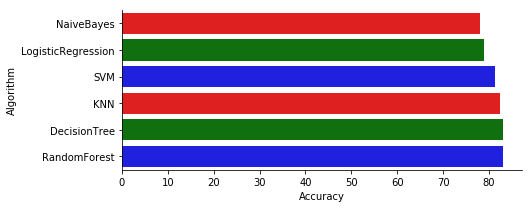

In [59]:
 sns.factorplot(x='Accuracy',y='Algorithm' , data=compare , kind='bar' , size=3 , aspect = 2.5, palette=['r','g','b','r','g','b'])

### Conclusion: Decision Tree and Random Forest models performs better than other models.